In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [5]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
X = data['data']
feature_names = data['feature_names']

In [7]:
Y = data['target']
class_names = data['target_names']

In [8]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
class_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
X.shape

(569, 30)

In [11]:
Y.shape

(569,)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.25, random_state=123, stratify=Y
)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X_train)

StandardScaler()

In [17]:
X_train = scaler.transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
pca = PCA(n_components=2)

In [20]:
pca.fit(X_train)

PCA(n_components=2)

In [21]:
pca.components_.shape

(2, 30)

In [22]:
pca_names = [f'pca_{i}' for i in range(pca.n_components_)]

In [23]:
pca_names

['pca_0', 'pca_1']

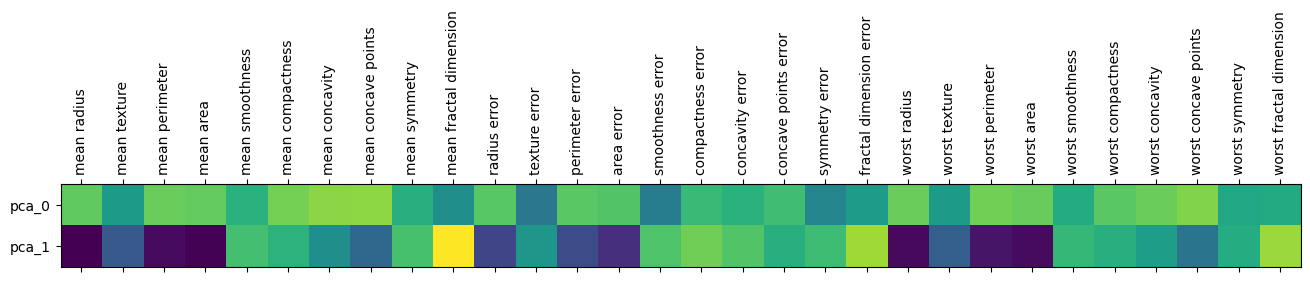

In [25]:
plt.matshow(pca.components_)
plt.xticks(ticks=range(pca.components_.shape[1]),
          labels=feature_names, rotation='vertical')
plt.yticks(ticks=range(pca.n_components_), labels=pca_names)
plt.show()

In [26]:
# OBJASNJENA VARIJANSA
pca.explained_variance_

array([13.1425886,  5.9362313])

In [27]:
# UDEO OBJASNJENE VARIJANSE
pca.explained_variance_ratio_

array([0.43705792, 0.19740988])

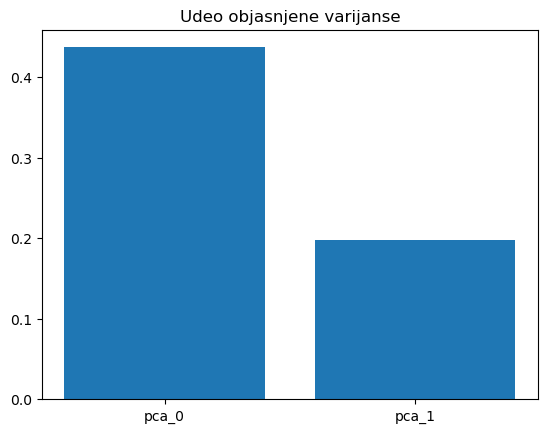

In [31]:
plt.bar(x=pca_names, height=pca.explained_variance_ratio_)
plt.title('Udeo objasnjene varijanse')
plt.show()

In [32]:
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)

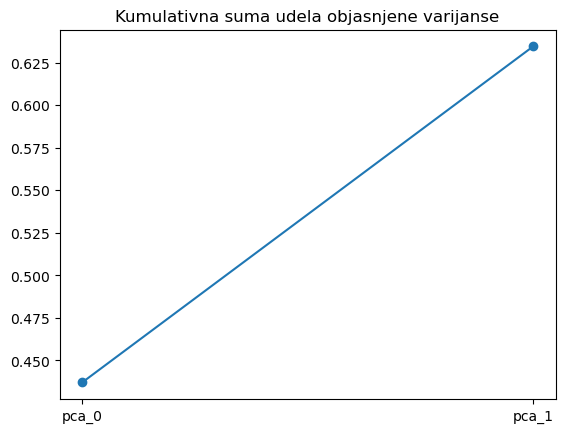

In [33]:
plt.plot(pca_names, cumulative_sum, marker='o')
plt.title('Kumulativna suma udela objasnjene varijanse')
plt.show()

In [34]:
X_train_pca = pca.transform(X_train)

In [35]:
X_test_pca = pca.transform(X_test)

In [36]:
X_train_pca.shape

(426, 2)

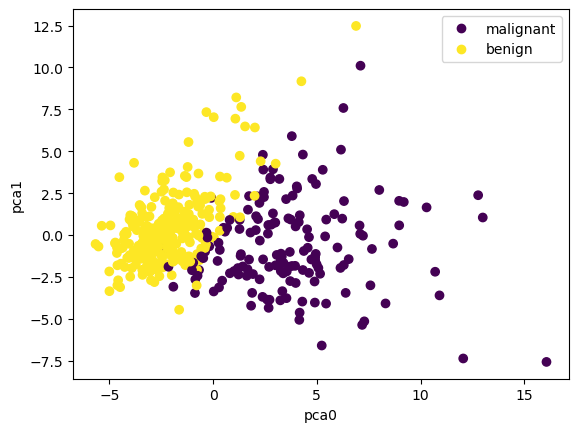

In [40]:
scatter = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train)
plt.xlabel('pca0')
plt.ylabel('pca1')
plt.legend(handles=scatter.legend_elements()[0], labels=class_names.tolist())
plt.show()